In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 
from math import pi as PI
import random
# !pip3 install higher
import torch.nn as nn
import torch
import random
from higher import innerloop_ctx
import warnings

ax_size=16
title_size=18

In [10]:
'''
k-Shot Plots
'''

num_k_shots = 10

algs = ["MAML", "MAML + CA", "Reptile"]
alg_files = [f"maml_sine_{num_k_shots}.npy", f"maml_ca_sine_{num_k_shots}.npy", f"Reptile/reptile_sine_{num_k_shots}.npy"]

all_alg_data = [np.load(alg_file) for alg_file in alg_files]



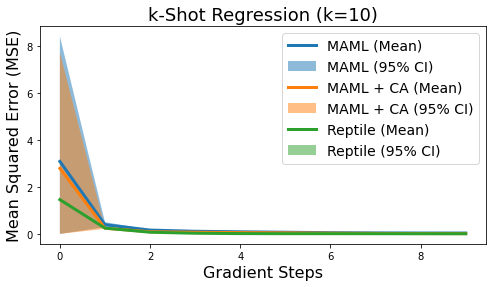

In [11]:
fig, ax = plt.subplots(figsize=(8,4))

for alg, alg_data in zip(algs, all_alg_data):  

    mean_loss = np.mean(alg_data, axis=0)

    # confidence interval plotting help from: https://stackoverflow.com/questions/59747313/how-to-plot-confidence-interval-in-python
    y = mean_loss
    x = list(range(num_k_shots))
    ci = 1.96 * np.std(alg_data, axis=0)**2/np.sqrt(len(y))

    ax_size=16
    title_size=18

    ax.plot(x, y, linewidth=3, label=f"{alg} (Mean)")
    # to avoid having MSE < 0
    truncated_error = np.clip(y-ci, a_min=0, a_max=None)
    ax.fill_between(x, truncated_error, (y+ci), alpha=.5,label=f"{alg} (95% CI)")

ax.set_xlabel("Gradient Steps",fontsize=ax_size)
ax.set_ylabel("Mean Squared Error (MSE)",fontsize=ax_size)
ax.set_title(f"k-Shot Regression (k={num_k_shots})",fontsize=title_size)
# help with legend size: https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
ax.legend(prop={'size': 14})#loc="upper right")
plt.savefig("comparative_sine_wave_reg_kshot.png")
# ax.set_ylim([0,7])